In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
import pygwalker as pyg
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [67]:
# Input readable date
start_readable_date = "01-09-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-09-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1756659600
1759251599


In [68]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [69]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature     timestamp  volt  \
1756659625  23.64177     95.72   1012.27        24.37  1.756660e+09  4.09   
1756659685  23.62361     95.73   1012.25        24.35  1.756660e+09  4.10   
1756659745  23.63656     95.69   1012.24        24.37  1.756660e+09  4.09   
1756659805  23.61713     95.75   1012.21        24.34  1.756660e+09  4.09   
1756659865  23.60545     95.74   1012.19        24.33  1.756660e+09  4.10   

            rainfall  rainrate  
1756659625       NaN       NaN  
1756659685       NaN       NaN  
1756659745       NaN       NaN  
1756659805       NaN       NaN  
1756659865       NaN       NaN  
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1756659653  24.17936  93.23323   1011.55    0.2794       0.0     25.35516   
1756659713  24.17448  93.19127   1011.52    0.2794       0.0     25.35783   
1756659773  24.18978  93.32098   1011.52    0.2794       0

In [79]:
cuaca1.isnull().sum()

dew                0
humidity           0
pressure           0
temperature        0
timestamp          0
volt               0
rainfall       21805
rainrate       21805
dtype: int64

In [74]:
cuaca2.isnull().sum()

dew             0
humidity        0
pressure        0
rainfall       71
rainrate       71
temperature     0
timestamp       0
volt            0
dtype: int64

In [78]:
cuaca1 = cuaca1.dropna(subset=['timestamp'])

In [70]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1757983423,24.99073,94.46,1014.11,25.95,1.757983e+09,4.13,NaN,NaN
1757983483,25.01164,94.41,1014.16,25.98,1.757983e+09,4.13,NaN,NaN
1757983543,25.05313,94.42,1014.17,26.02,1.757984e+09,4.12,NaN,NaN
1757983603,25.04096,94.24,1014.18,26.04,1.757984e+09,4.13,NaN,NaN
1757983663,25.03509,94.04,1014.15,26.07,1.757984e+09,4.14,NaN,NaN
1757983723,25.02101,93.85,1014.20,26.09,1.757984e+09,4.13,NaN,NaN
1757983783,25.00961,93.62,1014.15,26.12,1.757984e+09,4.13,NaN,NaN
1757983843,25.05382,93.59,1014.20,26.17,1.757984e+09,4.13,NaN,NaN
1757983903,25.04485,93.54,1014.19,26.17,1.757984e+09,4.13,NaN,NaN
1757983963,25.00535,93.32,1014.20,26.17,1.757984e+09,4.14,NaN,NaN


In [81]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1757983423,24.99073,94.46,1014.11,25.95,1757983423,4.13,NaN,NaN
1757983483,25.01164,94.41,1014.16,25.98,1757983483,4.13,NaN,NaN
1757983543,25.05313,94.42,1014.17,26.02,1757983543,4.12,NaN,NaN
1757983603,25.04096,94.24,1014.18,26.04,1757983603,4.13,NaN,NaN
1757983663,25.03509,94.04,1014.15,26.07,1757983663,4.14,NaN,NaN
1757983723,25.02101,93.85,1014.20,26.09,1757983723,4.13,NaN,NaN
1757983783,25.00961,93.62,1014.15,26.12,1757983783,4.13,NaN,NaN
1757983843,25.05382,93.59,1014.20,26.17,1757983843,4.13,NaN,NaN
1757983903,25.04485,93.54,1014.19,26.17,1757983903,4.13,NaN,NaN
1757983963,25.00535,93.32,1014.20,26.17,1757983963,4.14,NaN,NaN


In [82]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

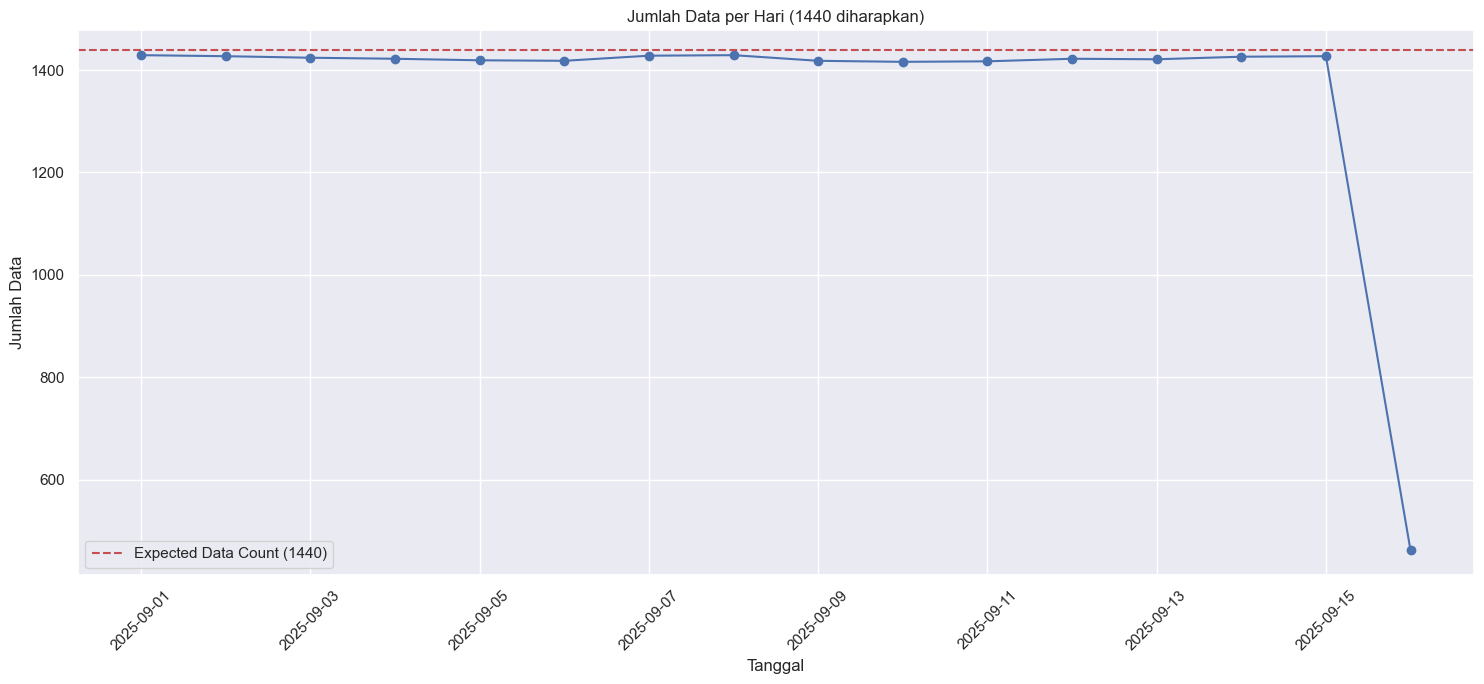

Hari dengan jumlah data yang kurang dari 1440:
          date  count
0   2025-09-01   1429
1   2025-09-02   1427
2   2025-09-03   1424
3   2025-09-04   1422
4   2025-09-05   1419
5   2025-09-06   1418
6   2025-09-07   1428
7   2025-09-08   1429
8   2025-09-09   1418
9   2025-09-10   1416
10  2025-09-11   1417
11  2025-09-12   1422
12  2025-09-13   1421
13  2025-09-14   1426
14  2025-09-15   1427
15  2025-09-16    462


In [83]:
# Mengelompokkan data berdasarkan hari
cuaca1['date'] = cuaca1['timestamp'].dt.date
data_per_day = cuaca1.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [84]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
date                                 object
dtype: object

In [85]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [86]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate,date
1756659625,23.64177,95.72,1012.27,24.37,2025-09-01 00:00:25+07:00,4.09,NaN,NaN,2025-09-01
1756659685,23.62361,95.73,1012.25,24.35,2025-09-01 00:01:25+07:00,4.10,NaN,NaN,2025-09-01
1756659745,23.63656,95.69,1012.24,24.37,2025-09-01 00:02:25+07:00,4.09,NaN,NaN,2025-09-01
1756659805,23.61713,95.75,1012.21,24.34,2025-09-01 00:03:25+07:00,4.09,NaN,NaN,2025-09-01
1756659865,23.60545,95.74,1012.19,24.33,2025-09-01 00:04:25+07:00,4.10,NaN,NaN,2025-09-01
1756659925,23.61713,95.75,1012.17,24.34,2025-09-01 00:05:25+07:00,4.09,NaN,NaN,2025-09-01
1756659985,23.60718,95.75,1012.17,24.33,2025-09-01 00:06:25+07:00,4.10,NaN,NaN,2025-09-01
1756660045,23.56913,95.76,1012.14,24.29,2025-09-01 00:07:25+07:00,4.10,NaN,NaN,2025-09-01
1756660105,23.58427,95.79,1012.13,24.30,2025-09-01 00:08:25+07:00,4.09,NaN,NaN,2025-09-01
1756660165,23.56309,95.84,1012.15,24.27,2025-09-01 00:09:25+07:00,4.10,NaN,NaN,2025-09-01


In [87]:
datacuaca = cuaca1
datacuaca2 = cuaca2

In [88]:
pyg.walk(datacuaca, hideDataSourceConfig=True, vegaTheme='vega' )
walker = pyg.walk(datacuaca)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063ee0b906fba5ilEZDVjcNHCsYbPh" style="height: auto">\n    <hea…

Box(children=(HTML(value='\n<div id="ifr-pyg-00063ee0b91a89e30dxMQV5mUSI9PFqN" style="height: auto">\n    <hea…

Visualisasi missing values untuk datacuaca:


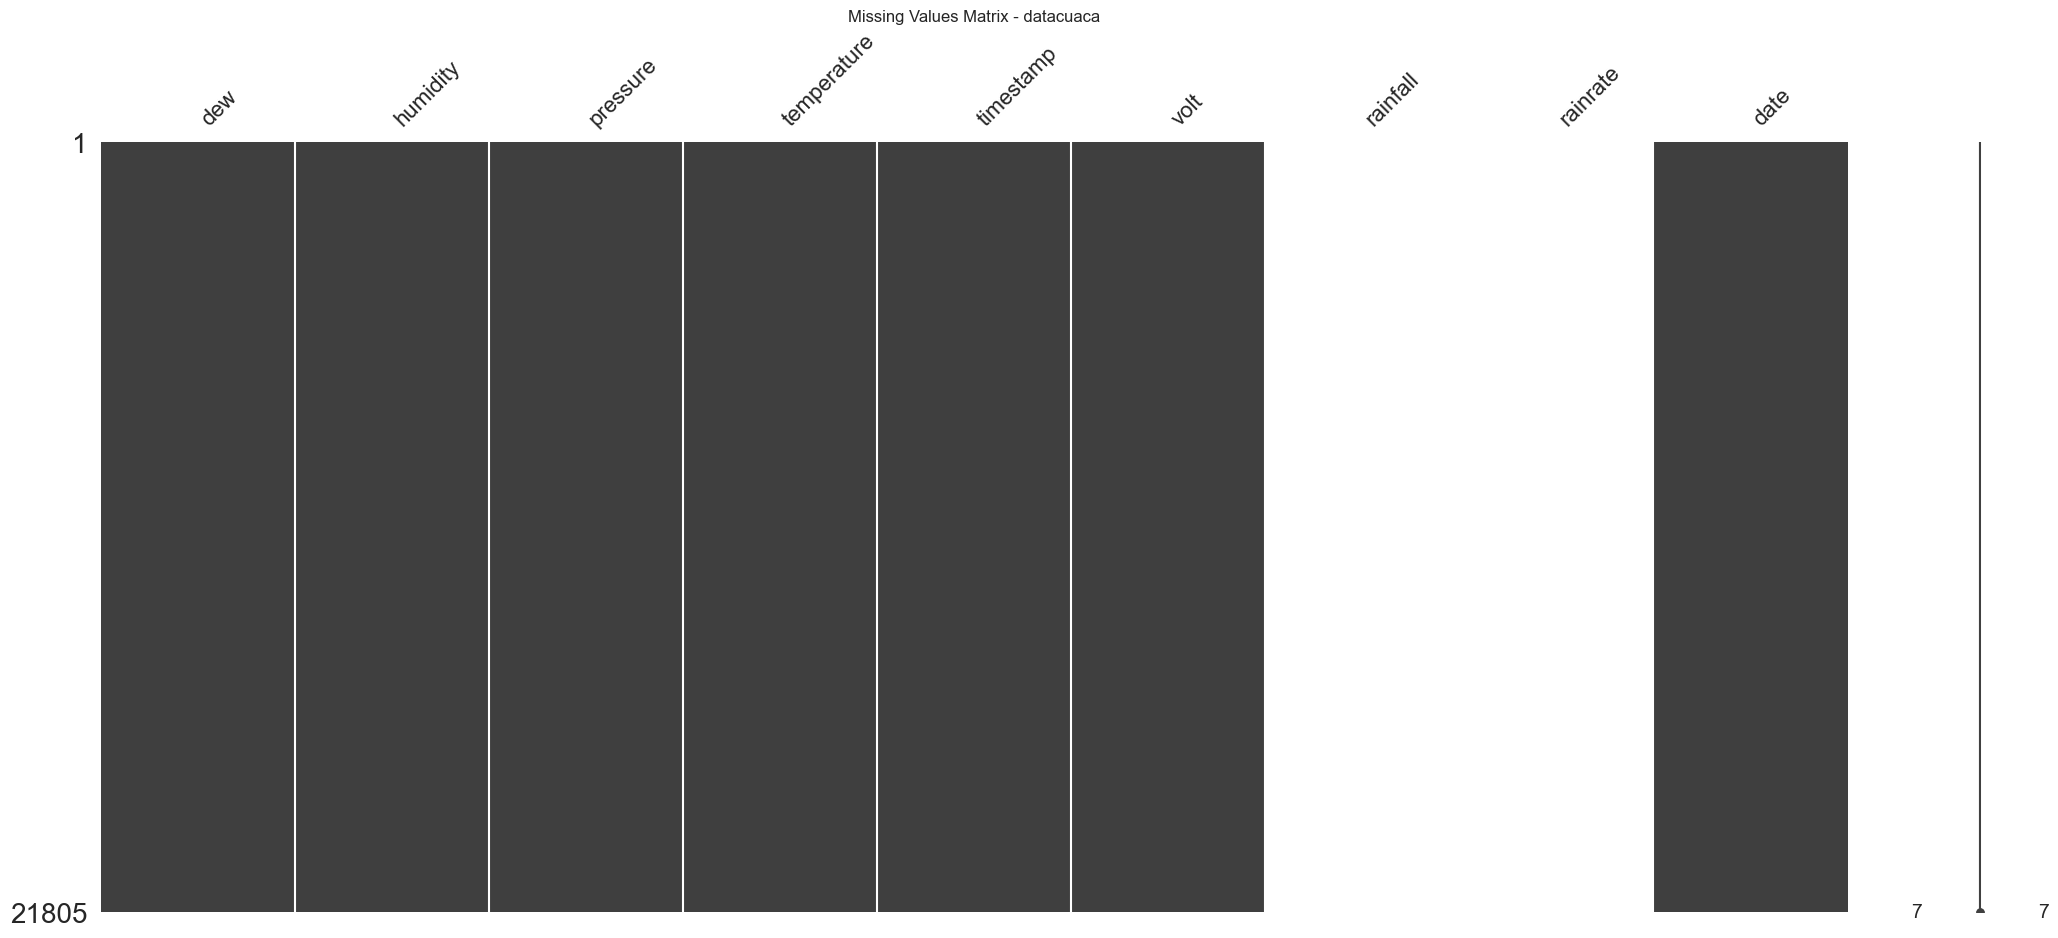

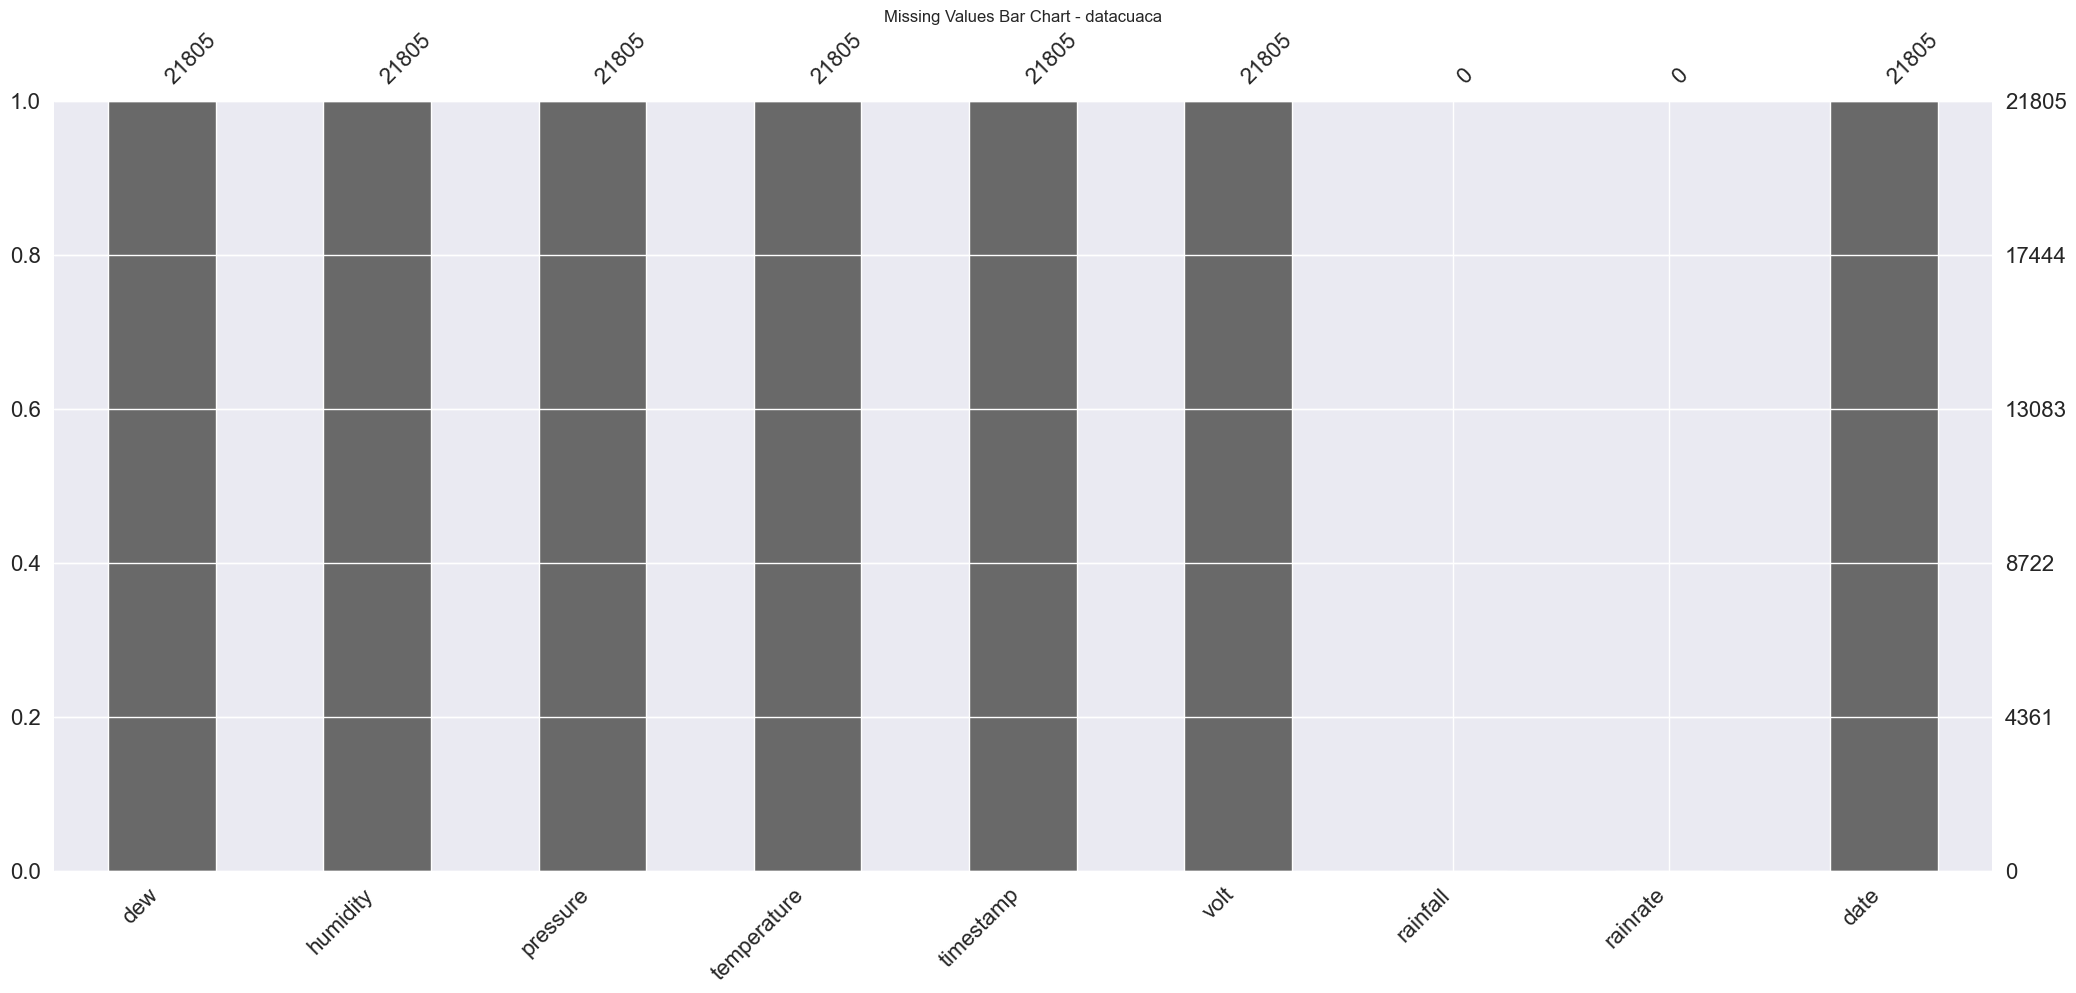

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


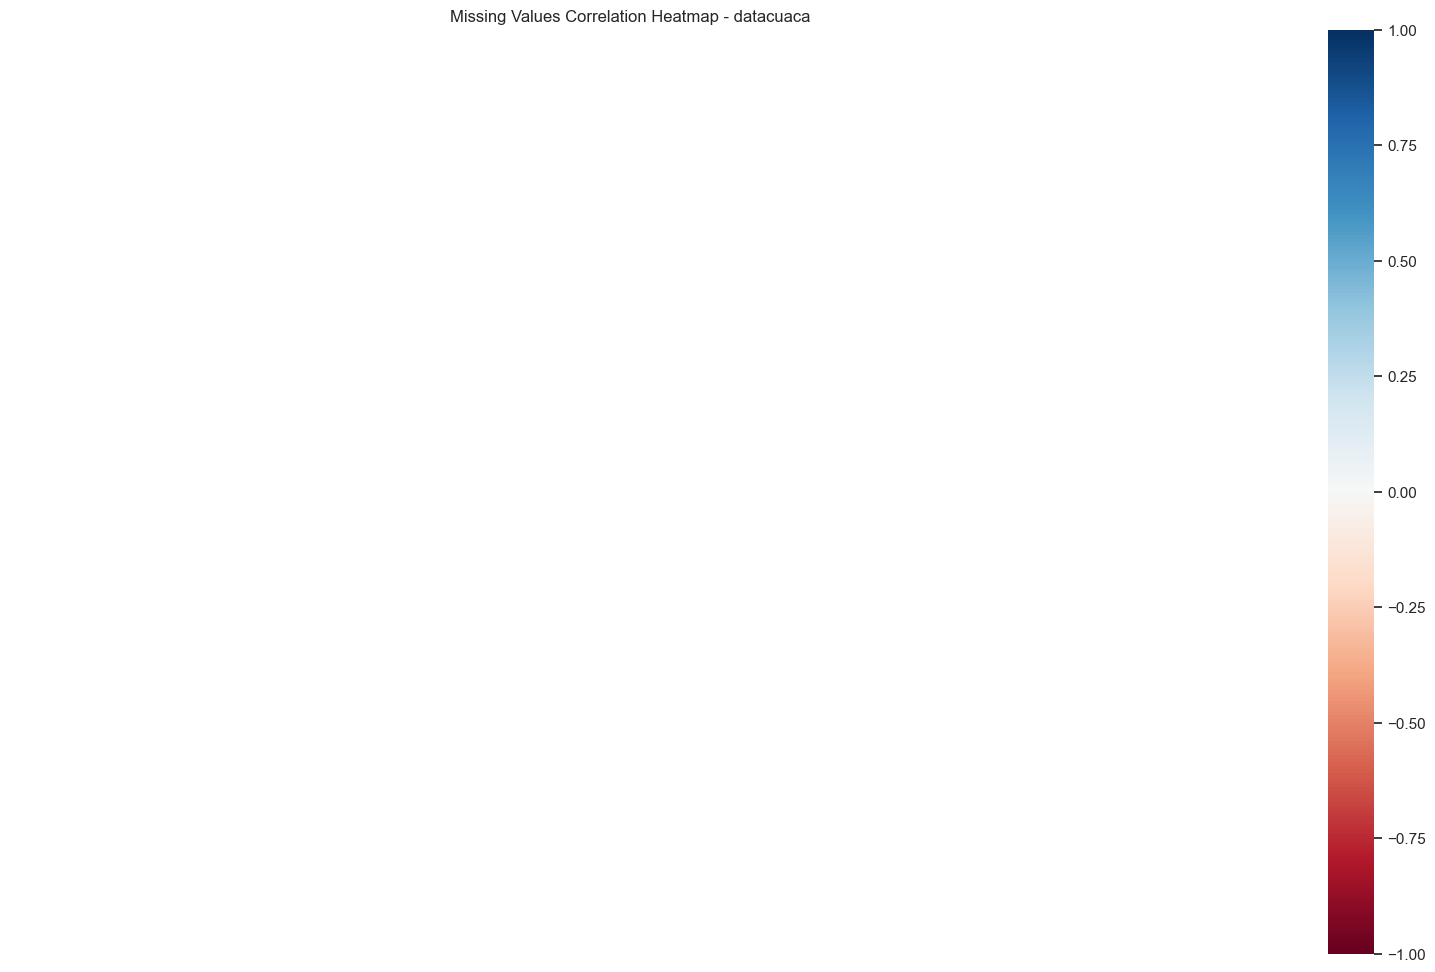

Visualisasi missing values untuk datacuaca2:


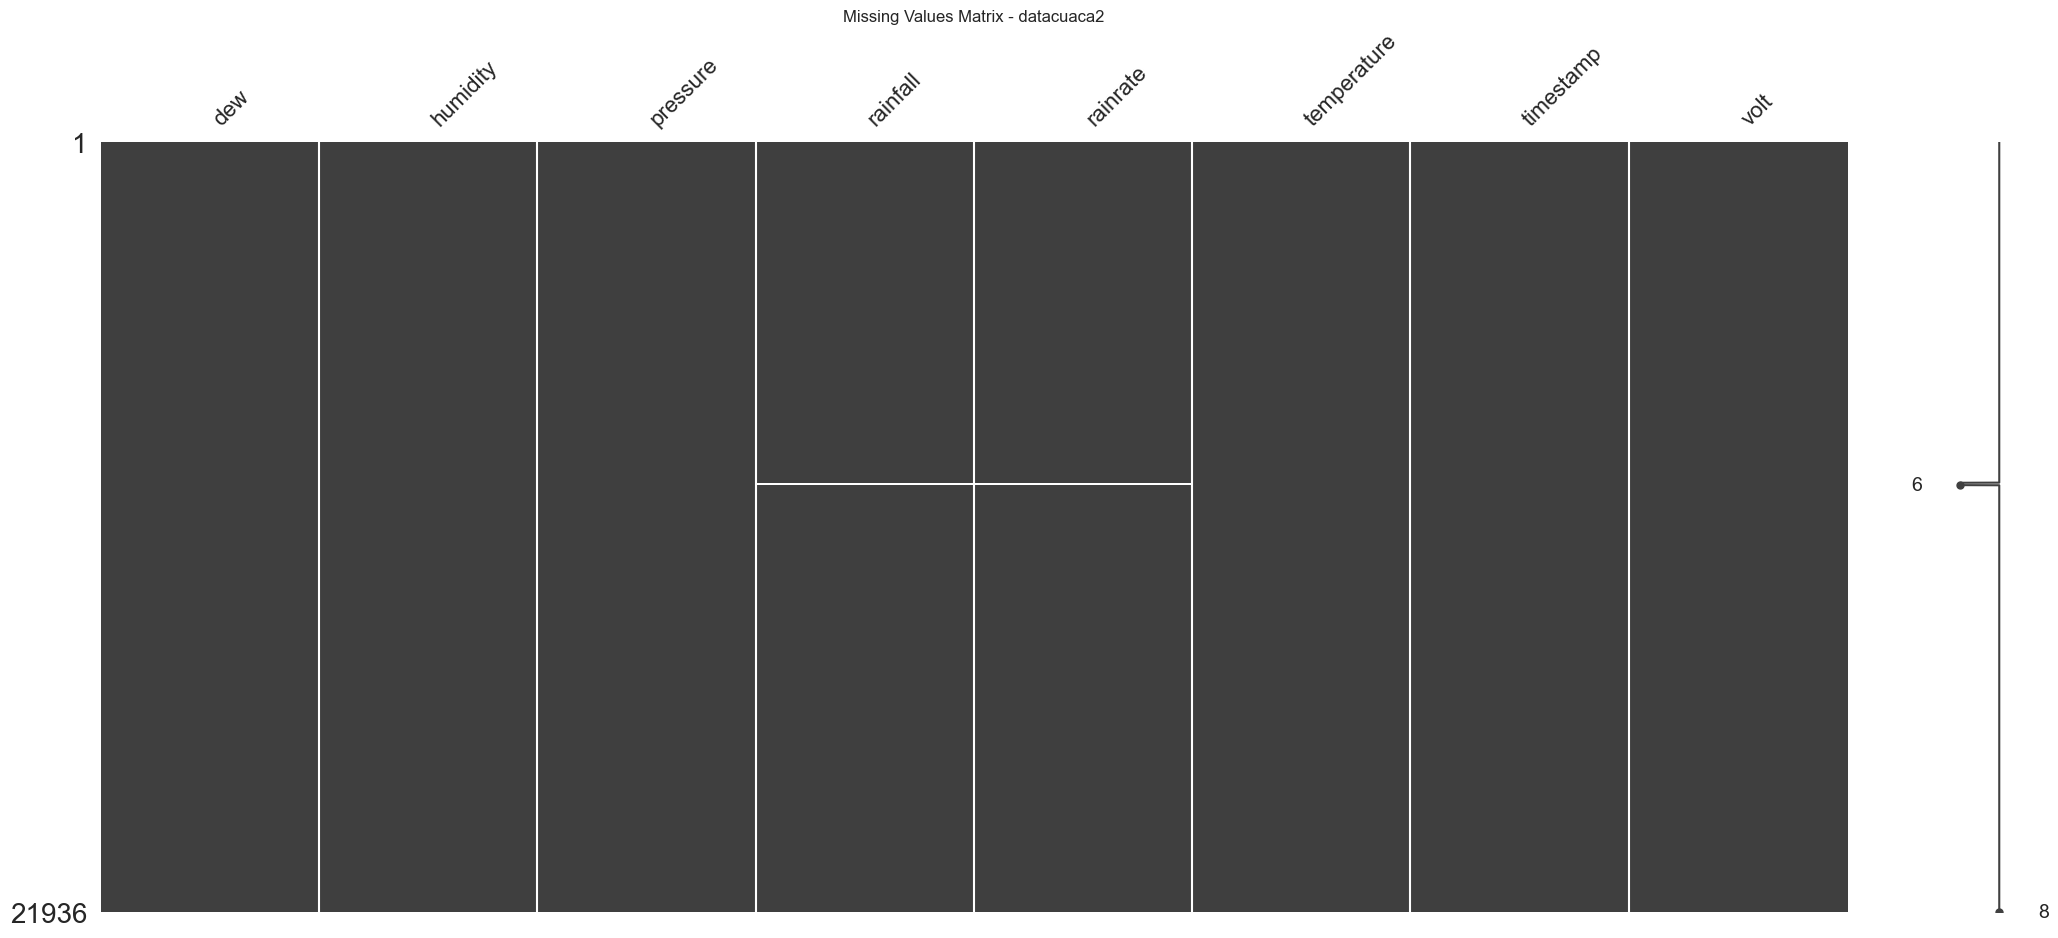

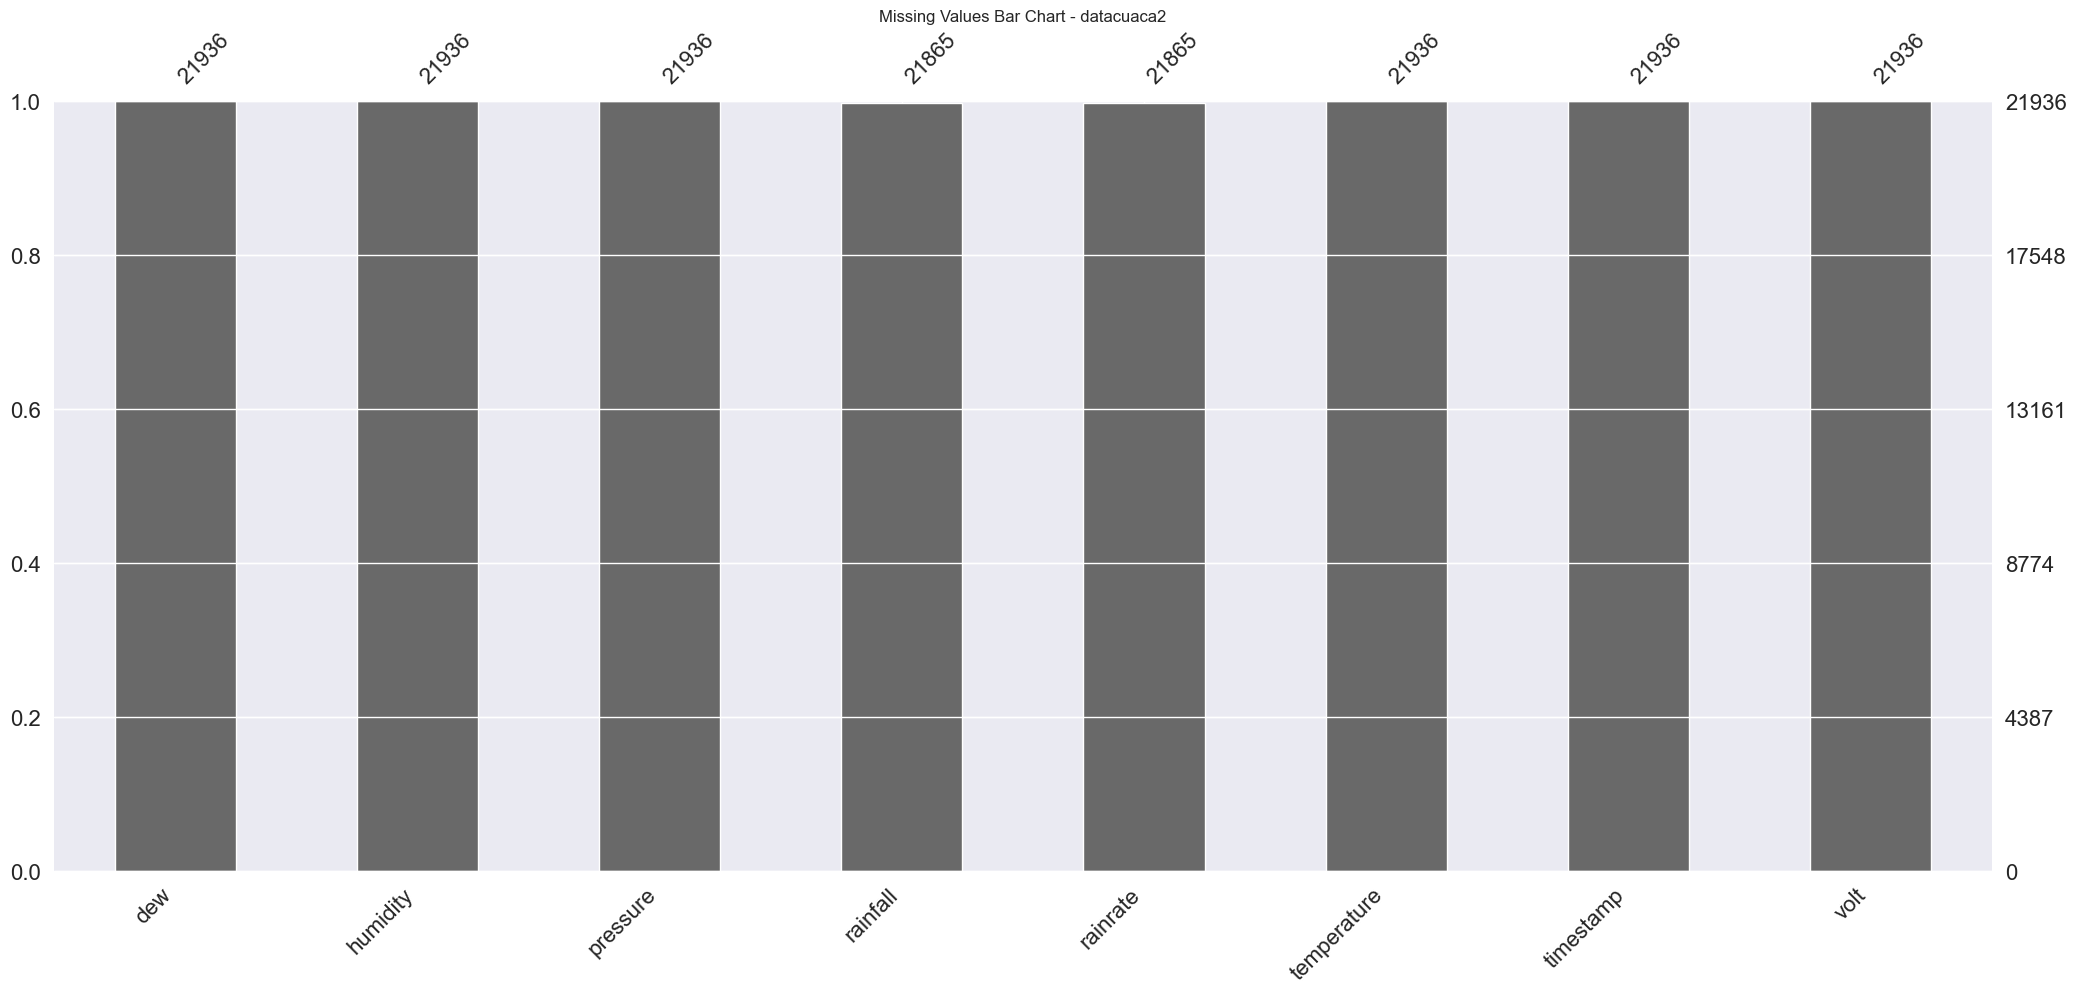

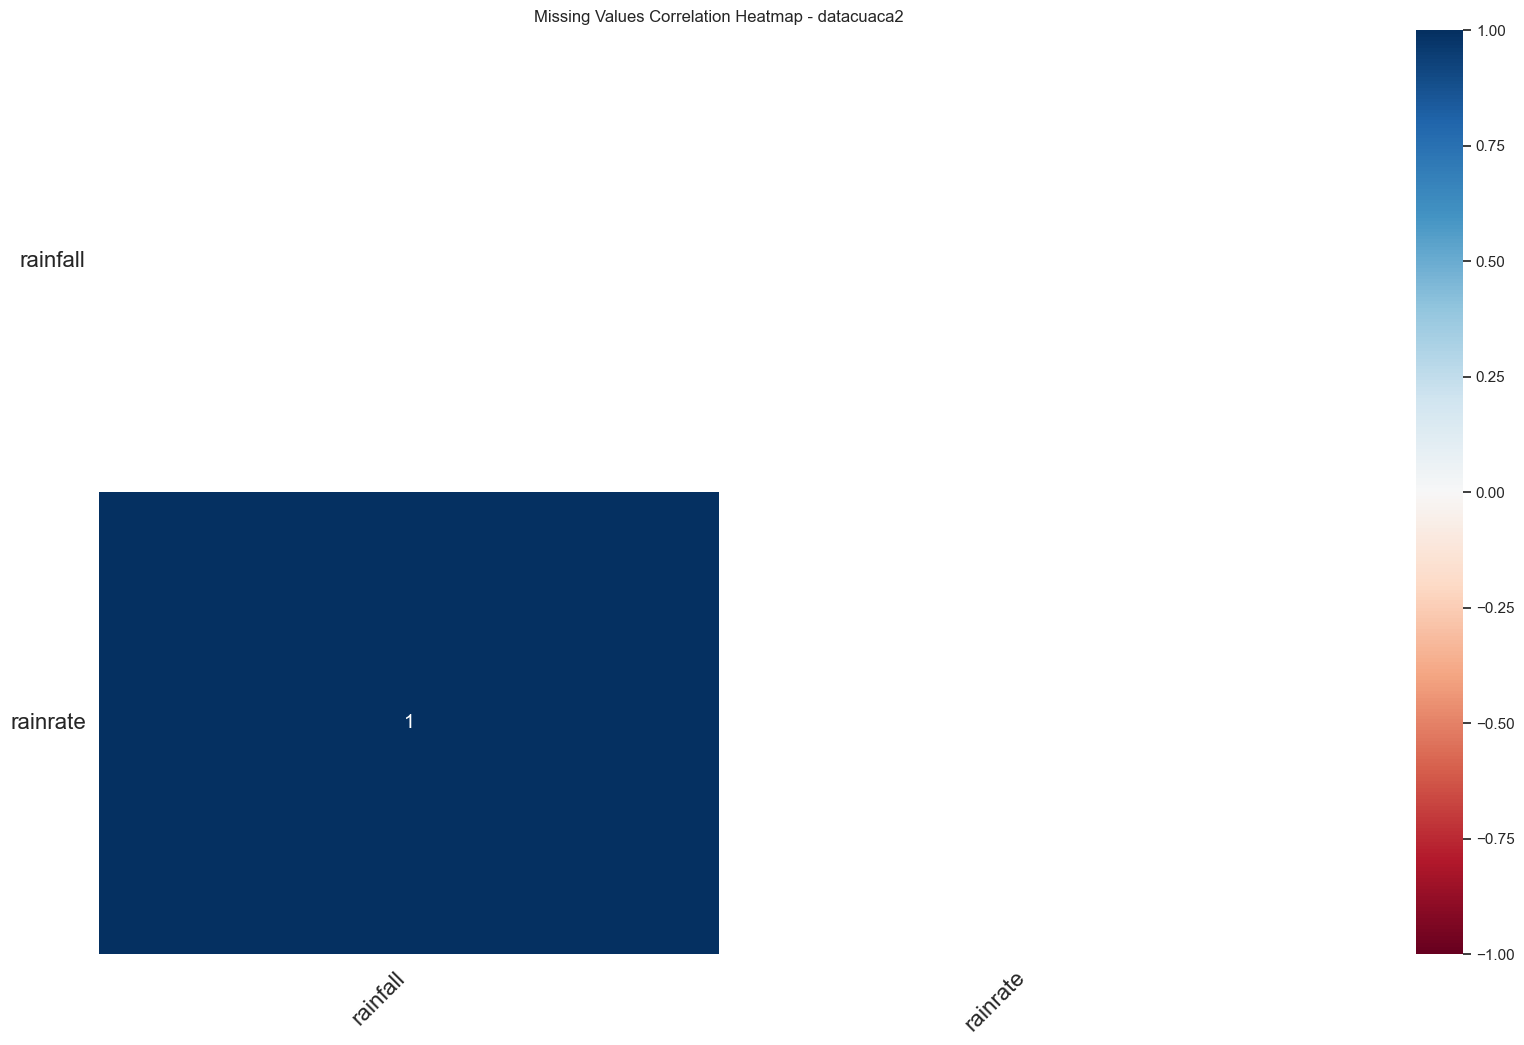

Ringkasan missing values untuk datacuaca:
dew                0
humidity           0
pressure           0
temperature        0
timestamp          0
volt               0
rainfall       21805
rainrate       21805
date               0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew             0
humidity        0
pressure        0
rainfall       71
rainrate       71
temperature     0
timestamp       0
volt            0
dtype: int64


In [89]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

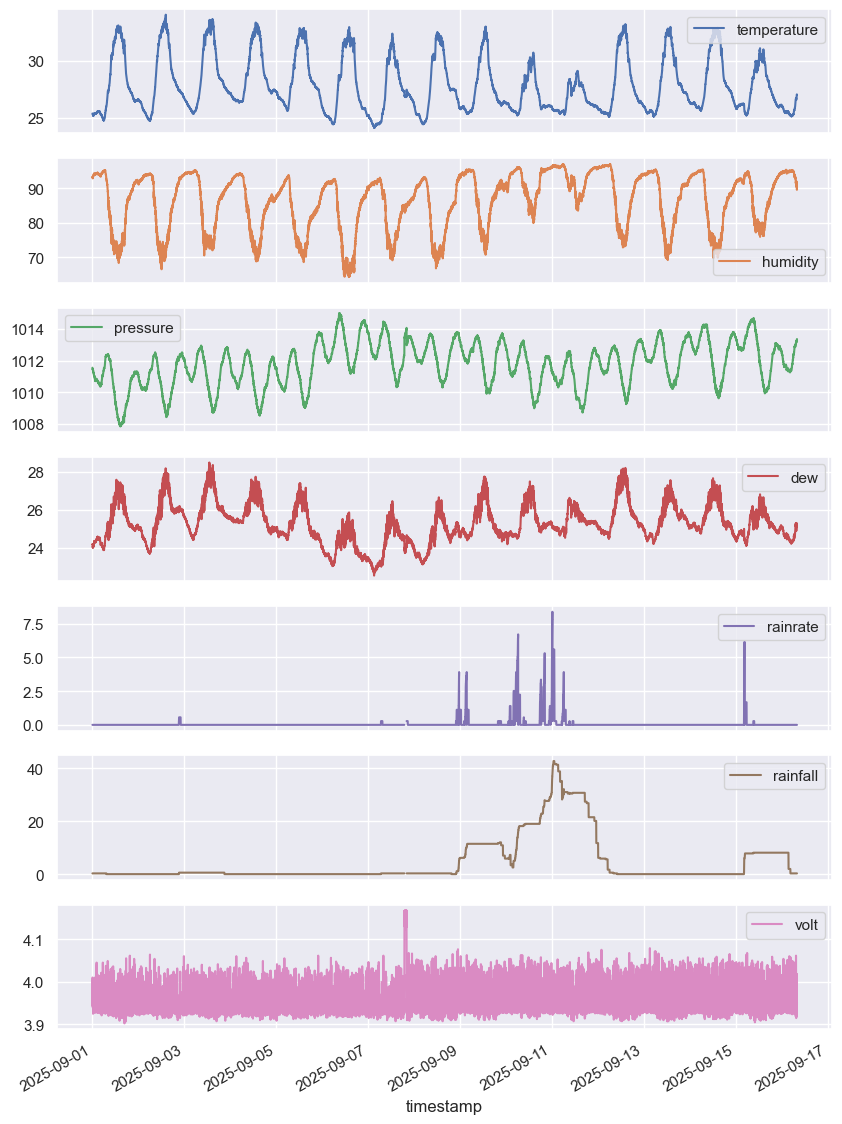

In [90]:
datacuaca2.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    'rainrate',
    'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

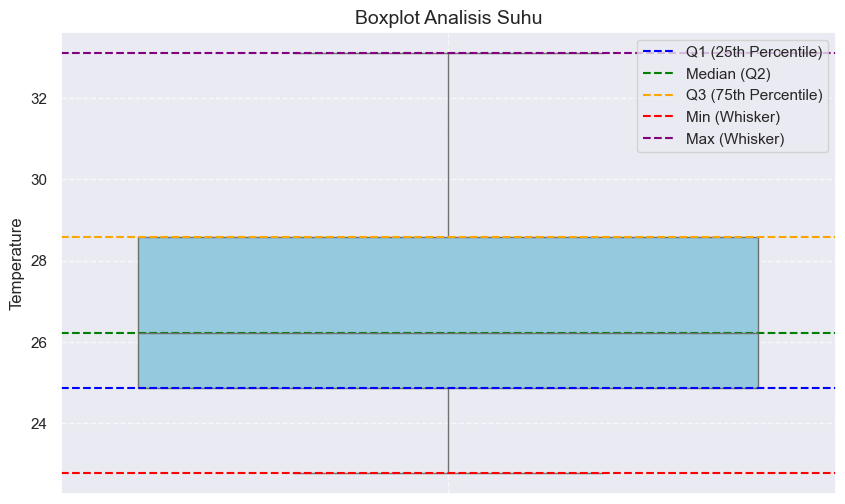

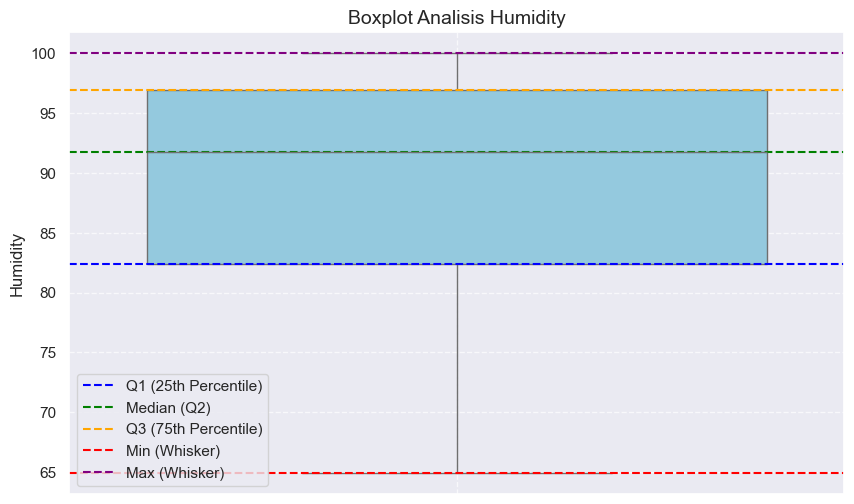

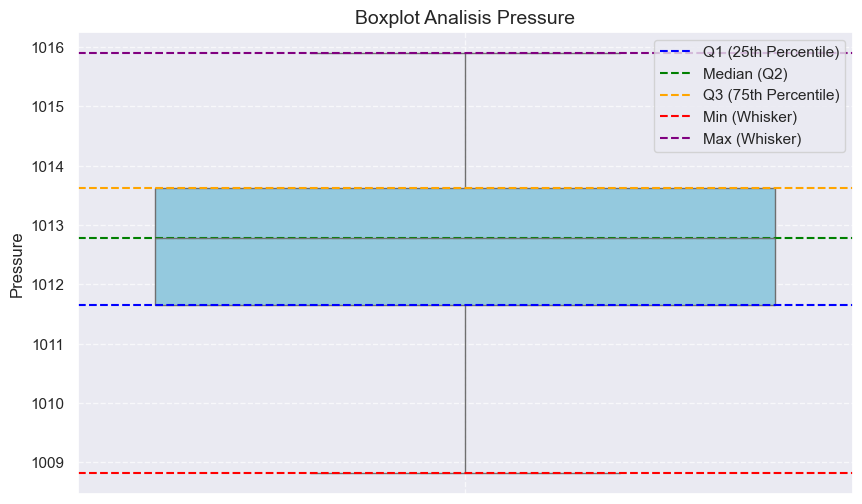

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membuat boxplot analisis
def create_boxplot(data, column, title):
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=data[column], color='skyblue')
        
        # Menambahkan garis untuk Q1, Median (Q2), Q3, dan whiskers
        q1 = data[column].quantile(0.25)
        median = data[column].median()
        q3 = data[column].quantile(0.75)
        min_val = data[column].min()
        max_val = data[column].max()
        
        plt.axhline(q1, color='blue', linestyle='--', label='Q1 (25th Percentile)')
        plt.axhline(median, color='green', linestyle='--', label='Median (Q2)')
        plt.axhline(q3, color='orange', linestyle='--', label='Q3 (75th Percentile)')
        plt.axhline(min_val, color='red', linestyle='--', label='Min (Whisker)')
        plt.axhline(max_val, color='purple', linestyle='--', label='Max (Whisker)')
        
        # Menambahkan label dan judul
        plt.title(title, fontsize=14)
        plt.ylabel(column.capitalize(), fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
# Membuat boxplot untuk temperature
create_boxplot(datacuaca, 'temperature', 'Boxplot Analisis Suhu')

# Membuat boxplot untuk humidity
create_boxplot(datacuaca, 'humidity', 'Boxplot Analisis Humidity')

# Membuat boxplot untuk pressure
create_boxplot(datacuaca, 'pressure', 'Boxplot Analisis Pressure')

In [92]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [93]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [94]:
pilih_tahun = 2025
pilih_bulan = 9

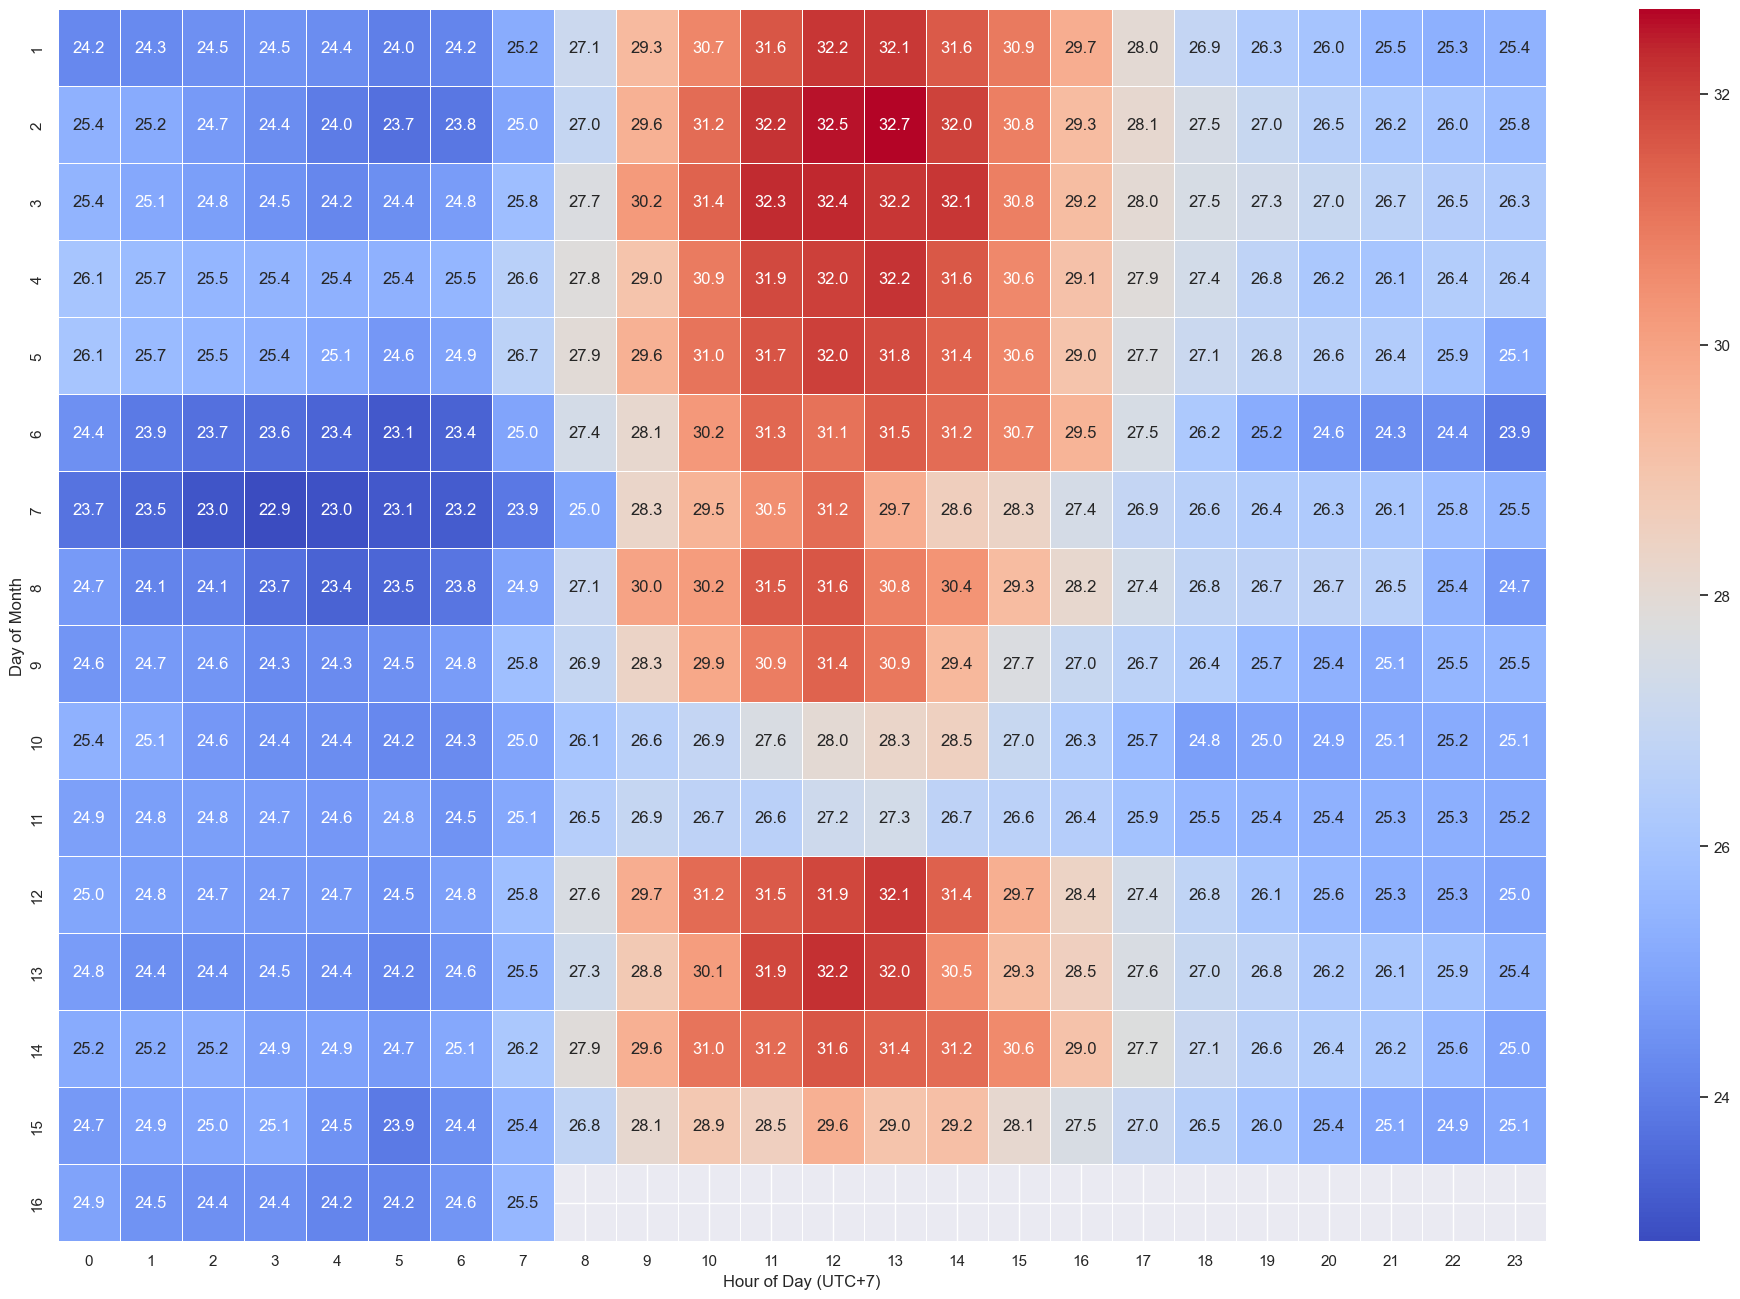

In [95]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_sorted = datacuaca.sort_values(by='timestamp')

# Mendapatkan rentang tanggal dari data untuk nama file
min_date = datacuaca_sorted['timestamp'].min()
max_date = datacuaca_sorted['timestamp'].max()
start_date_str = min_date.strftime('%Y%m%d')
end_date_str = max_date.strftime('%Y%m%d')

# Menggunakan bulan dan tahun dari min_date untuk filter data
tahun = min_date.year
bulan = min_date.month

# Filter data untuk bulan tersebut
datacuaca_month = datacuaca_sorted[(datacuaca_sorted['timestamp'].dt.year == tahun) & 
								   (datacuaca_sorted['timestamp'].dt.month == bulan)]

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig(f"Temp_range_{start_date_str}_to_{end_date_str}.jpg")
plt.show()



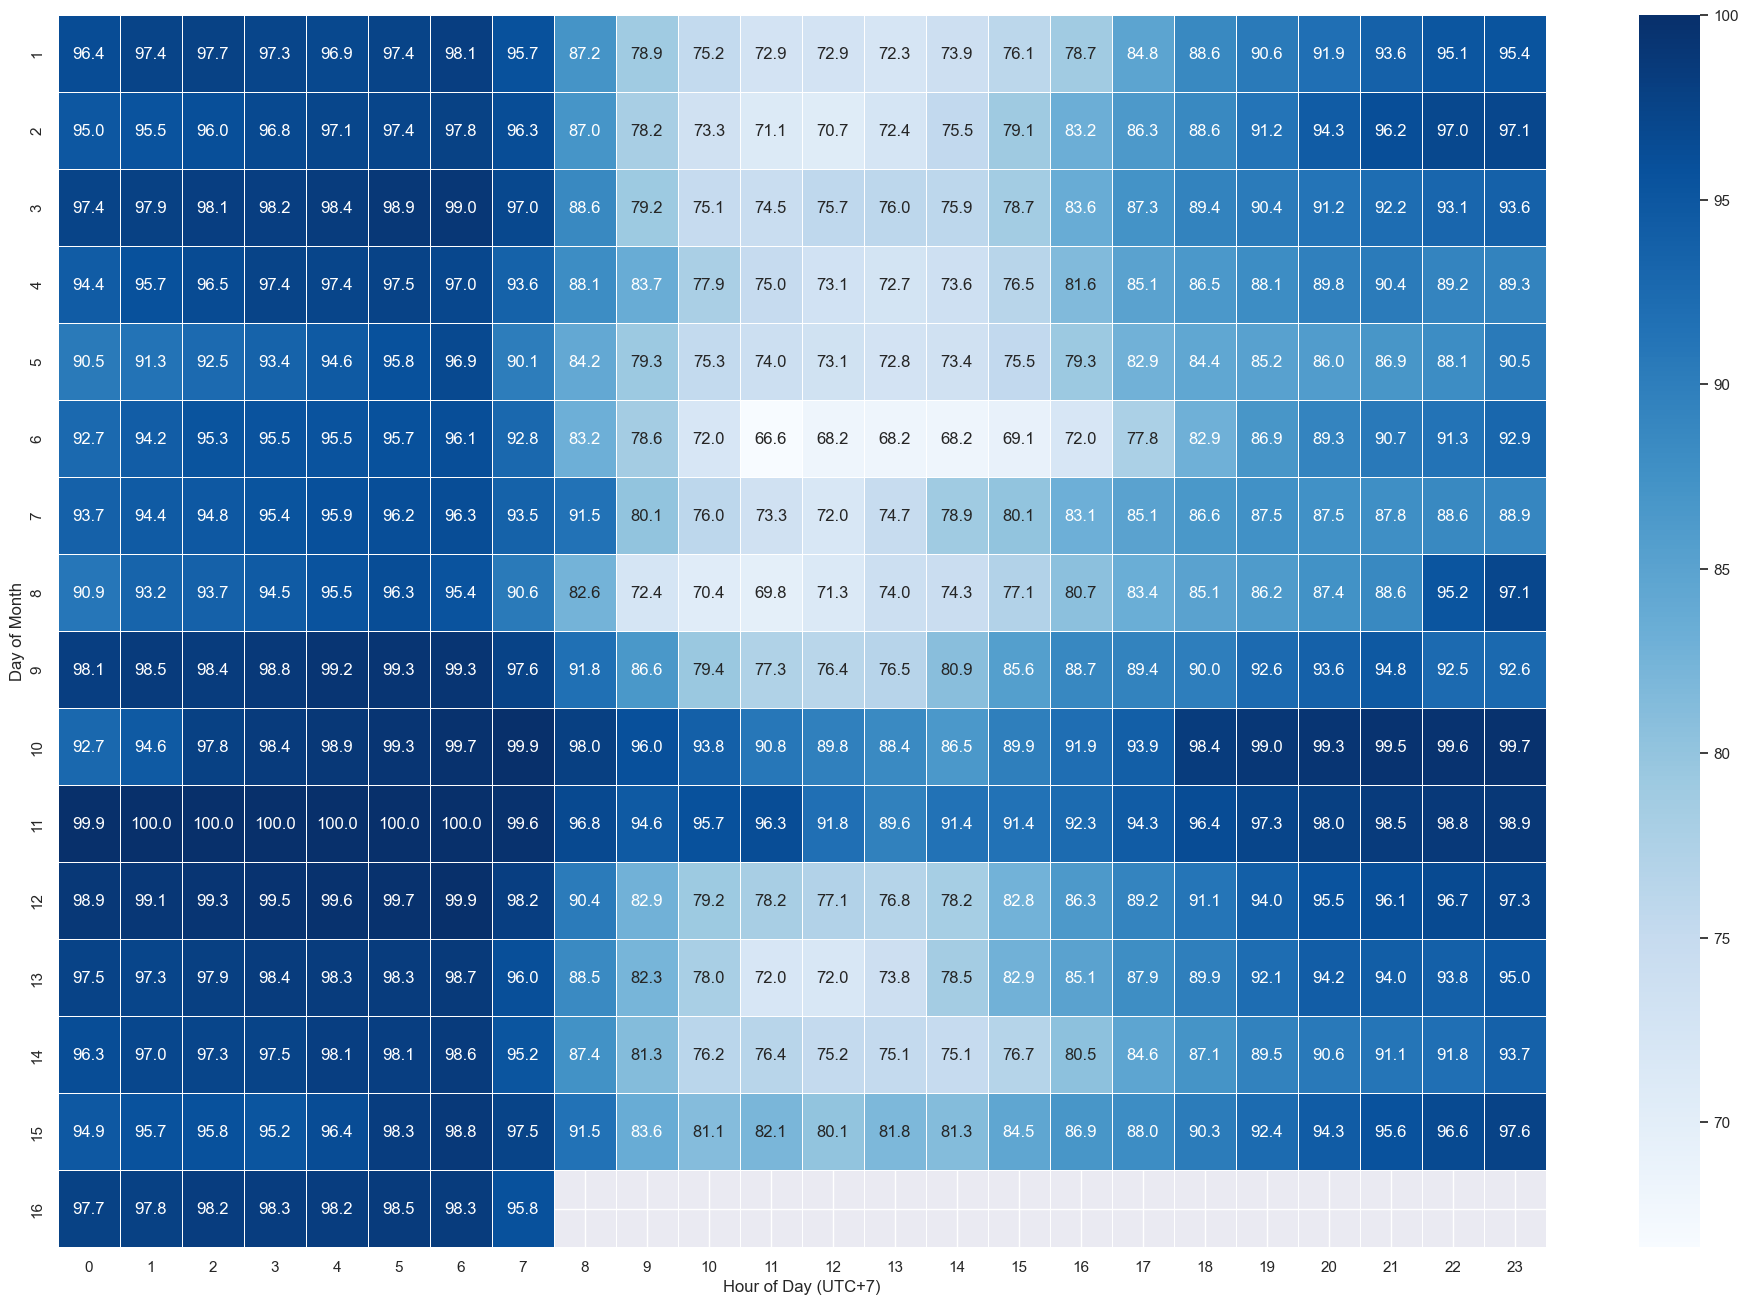

In [96]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(267.25, 0.5, 'Day of Month')

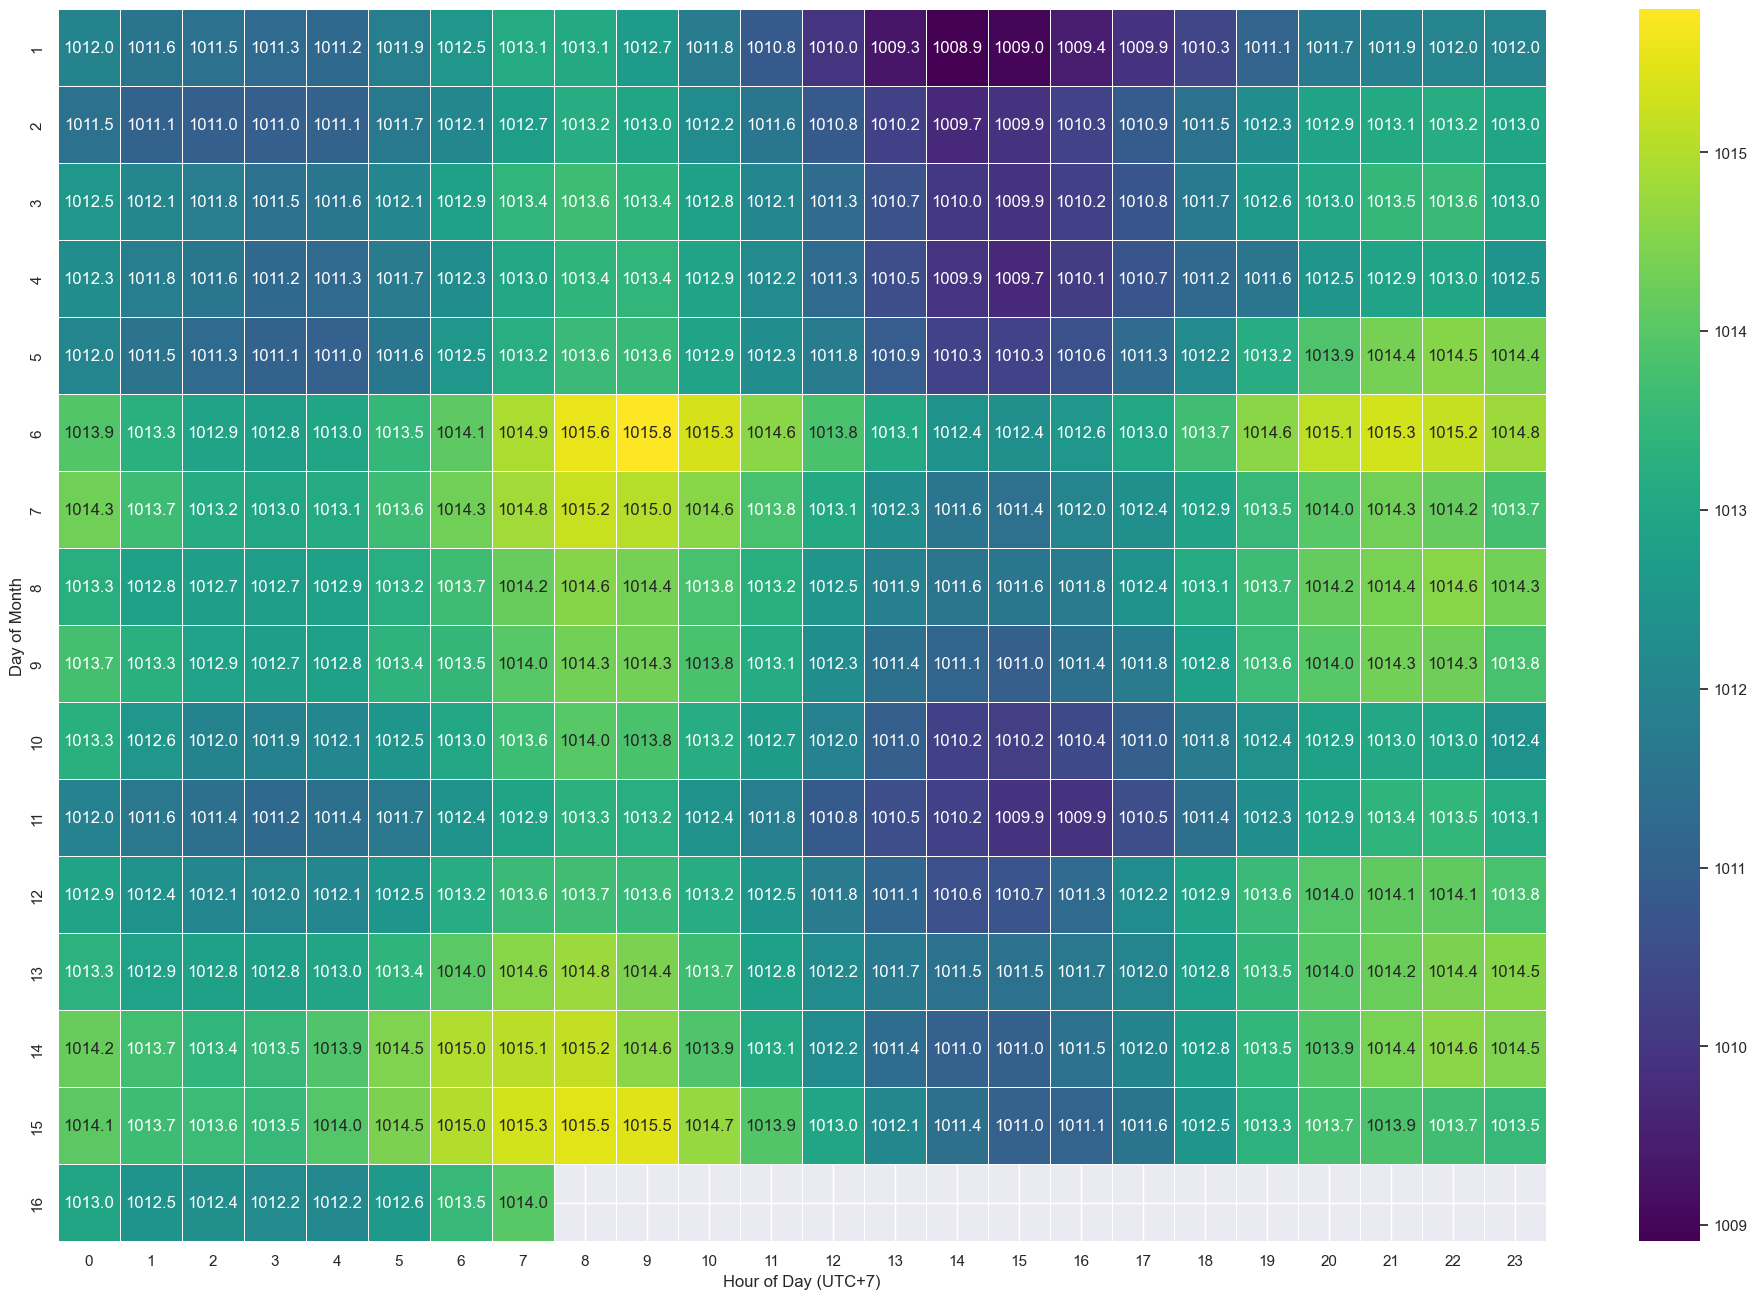

In [97]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(267.25, 0.5, 'Day of Month')

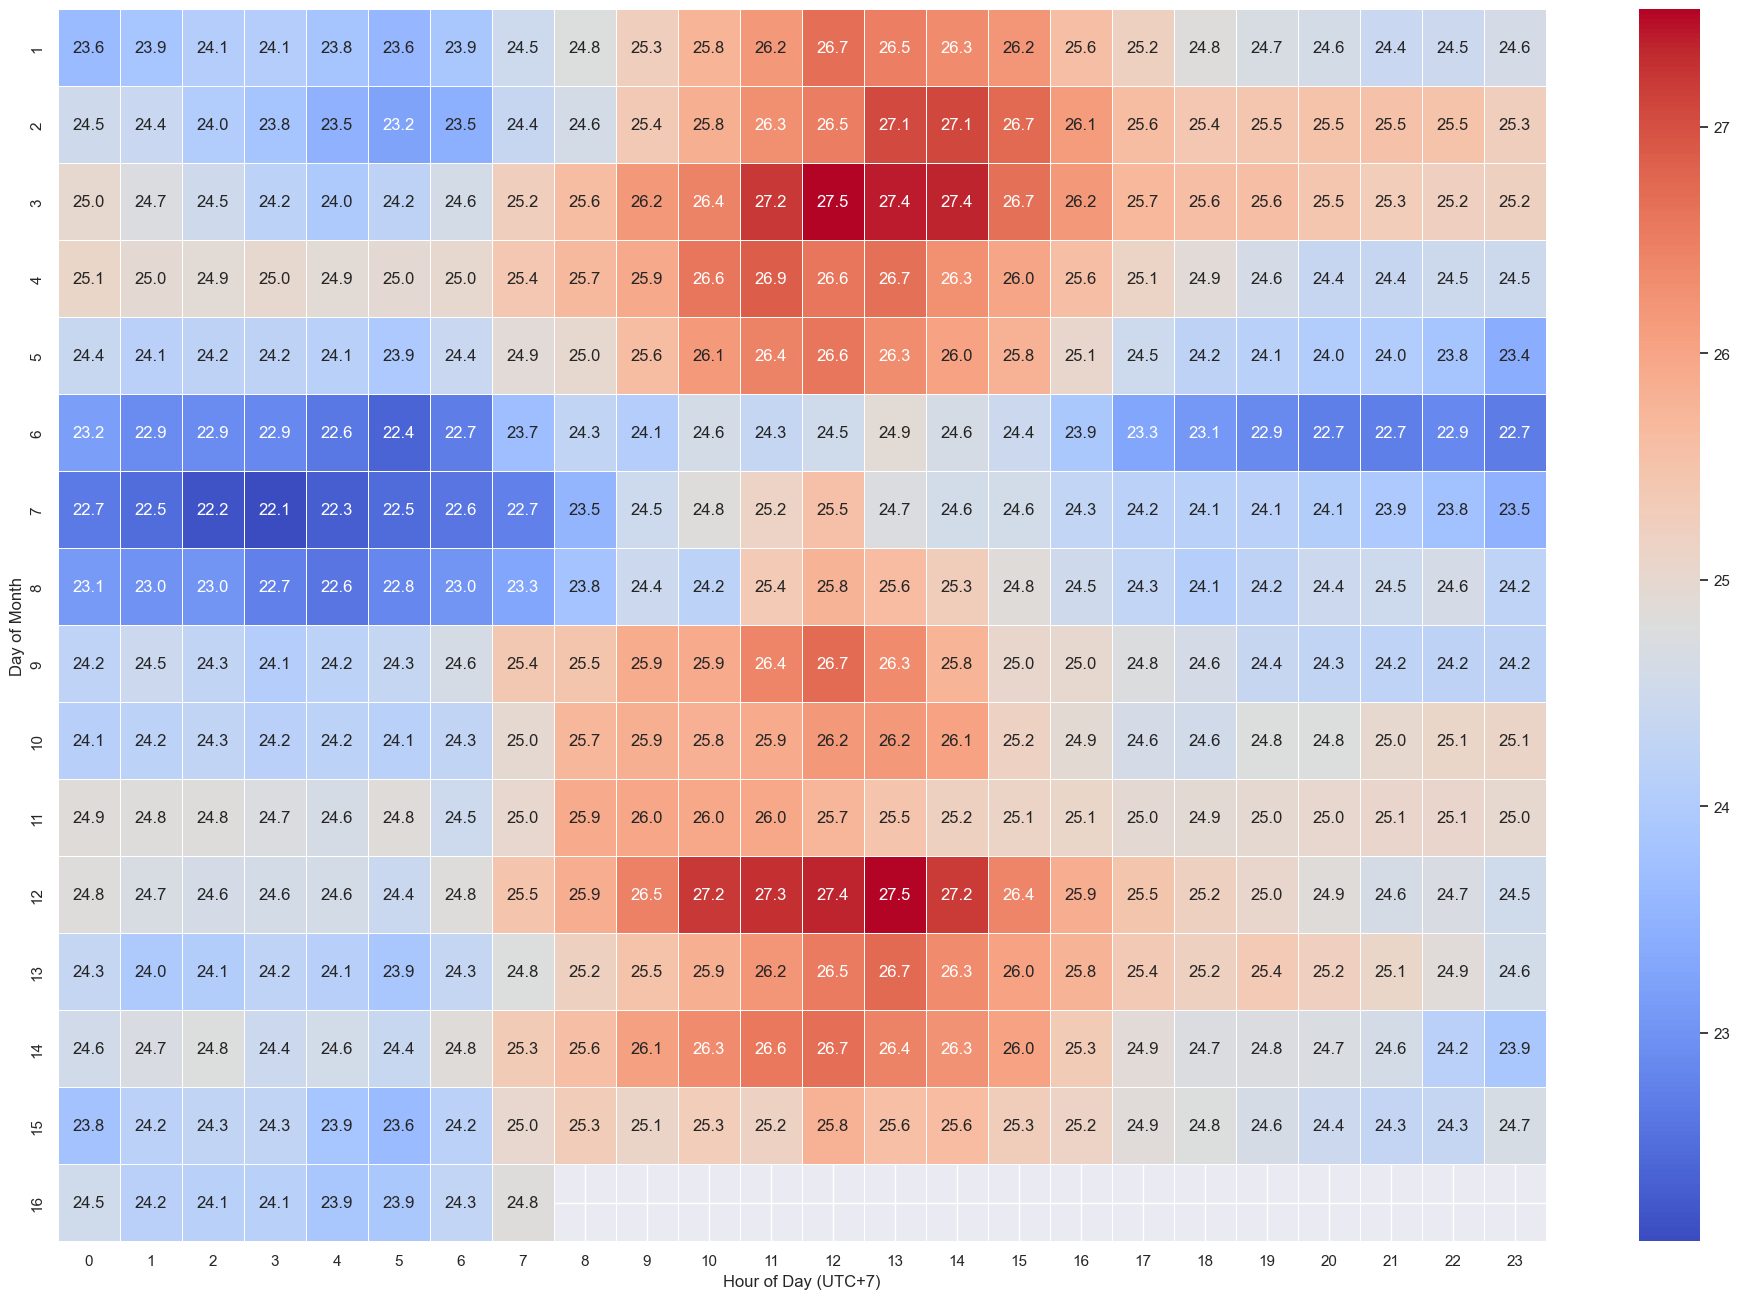

In [98]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(267.25, 0.5, 'Day of Month')

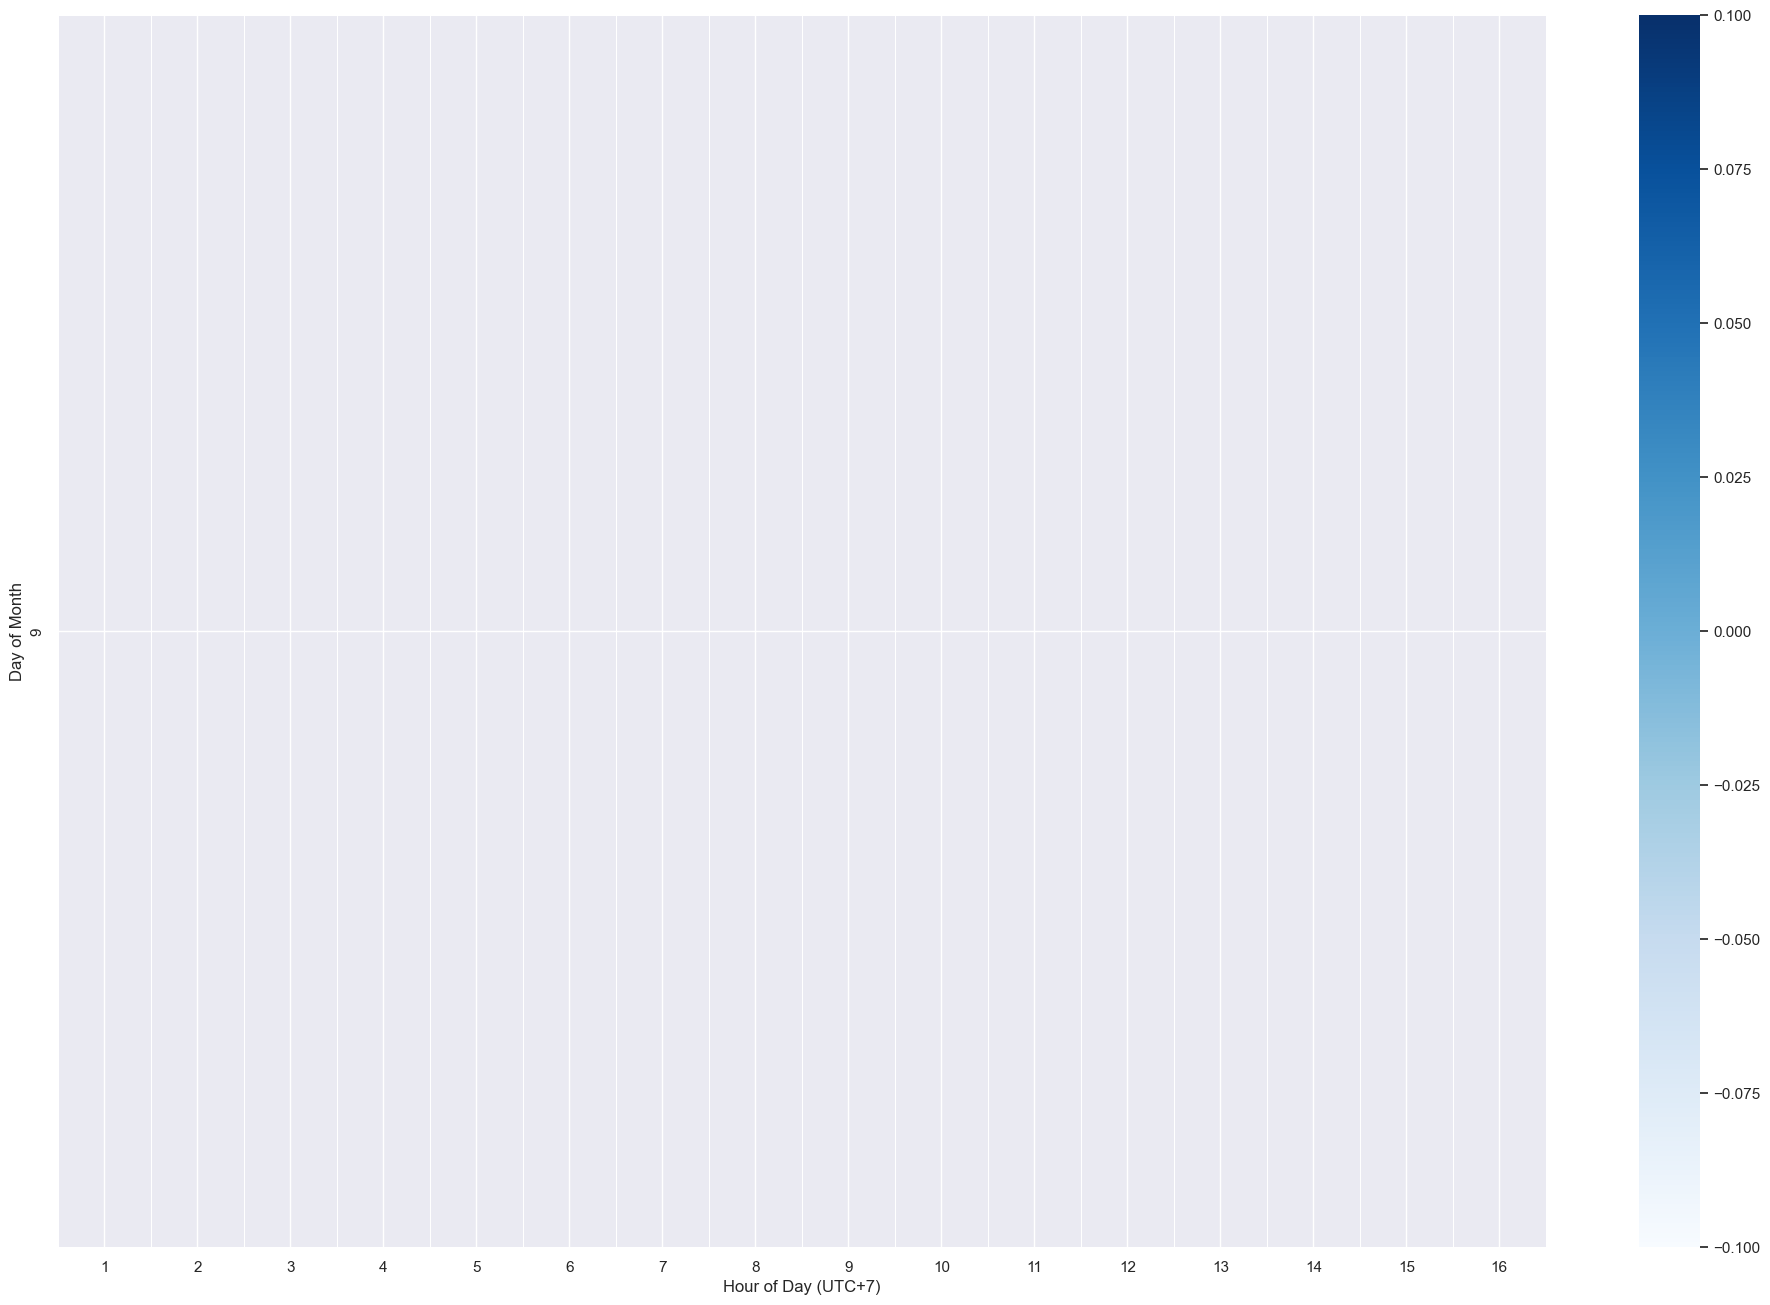

In [99]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['month', 'day']).agg({'rainfall': 'max'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainfall_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='rainfall')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainfall_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(267.25, 0.5, 'Day of Month')

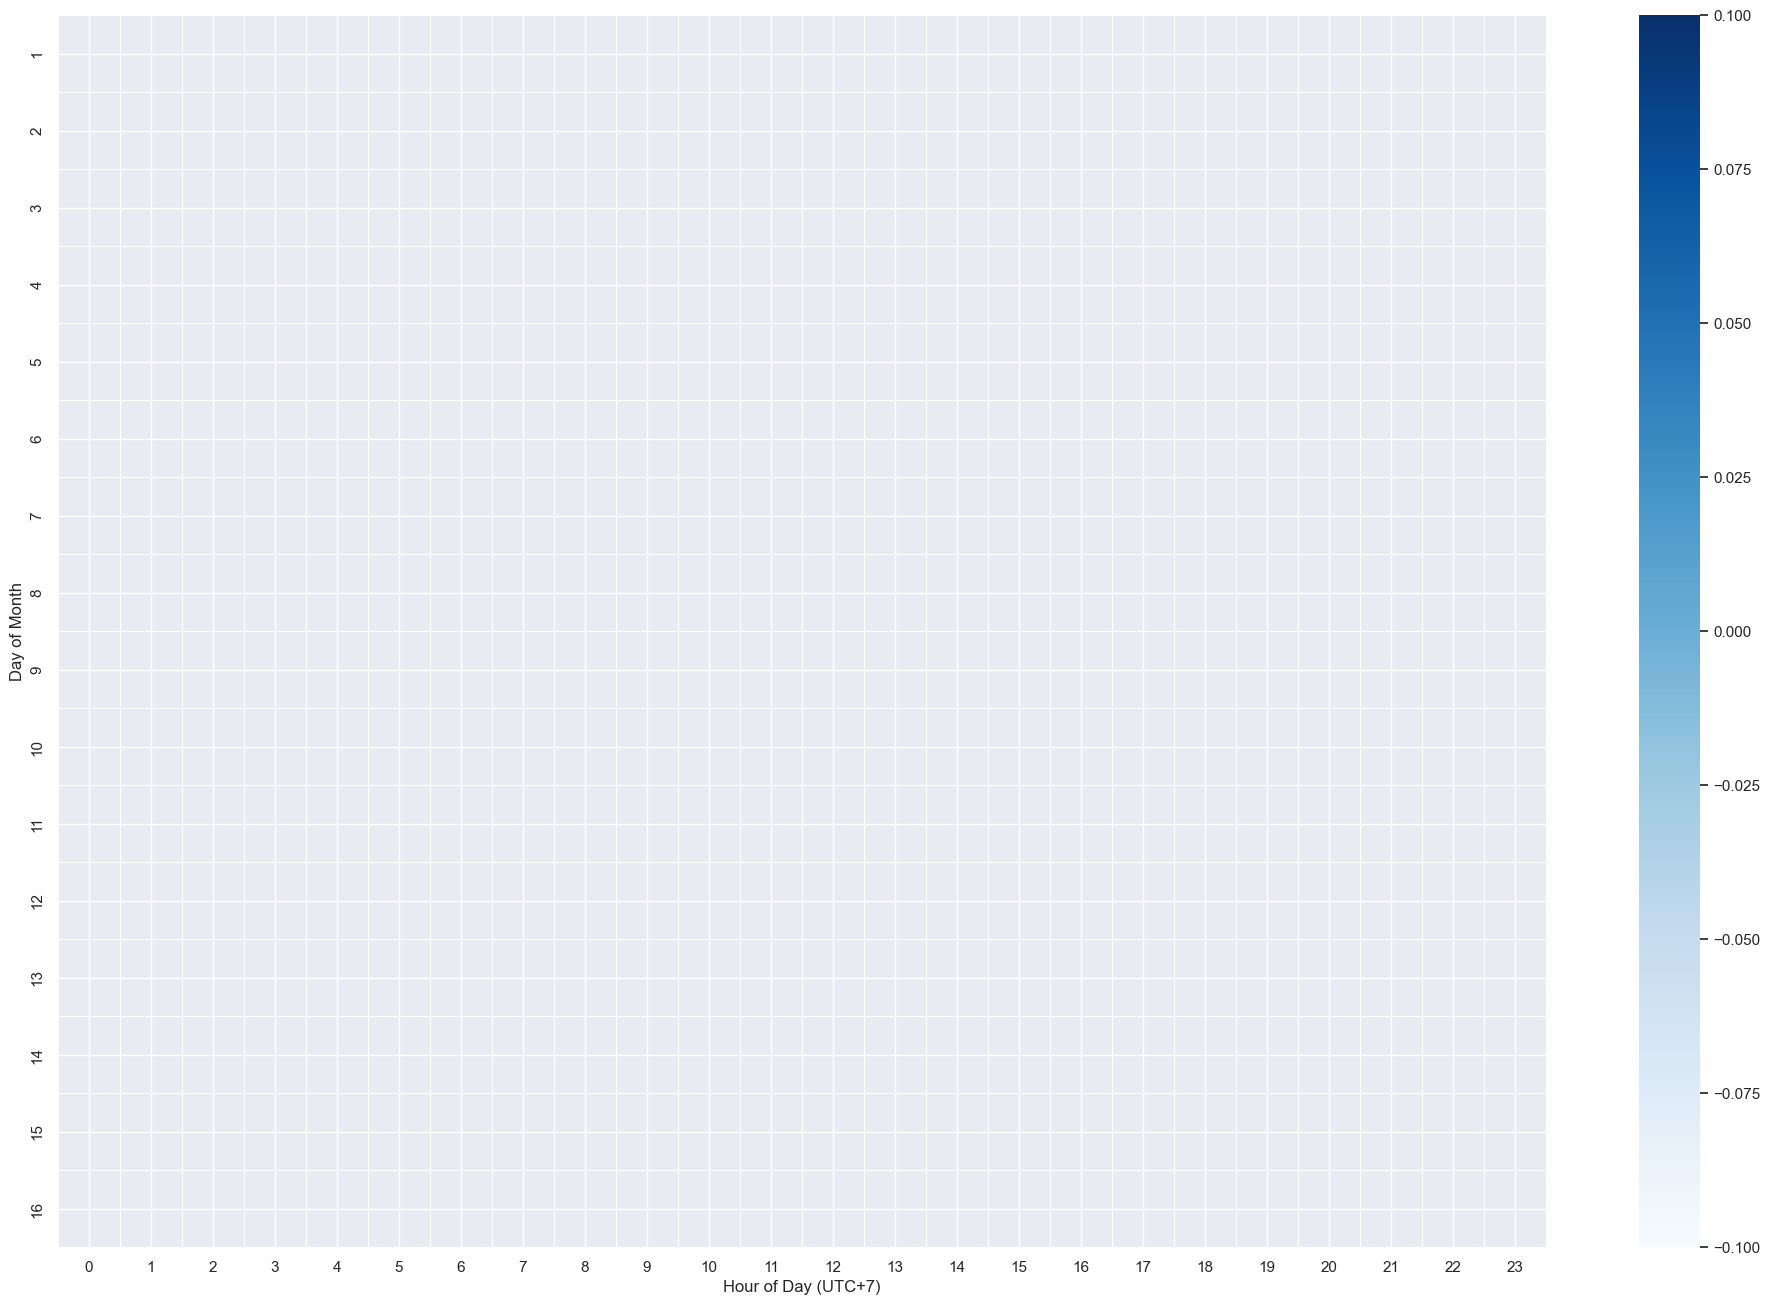

In [100]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'rainrate': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainrate_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='rainrate')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainrate_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

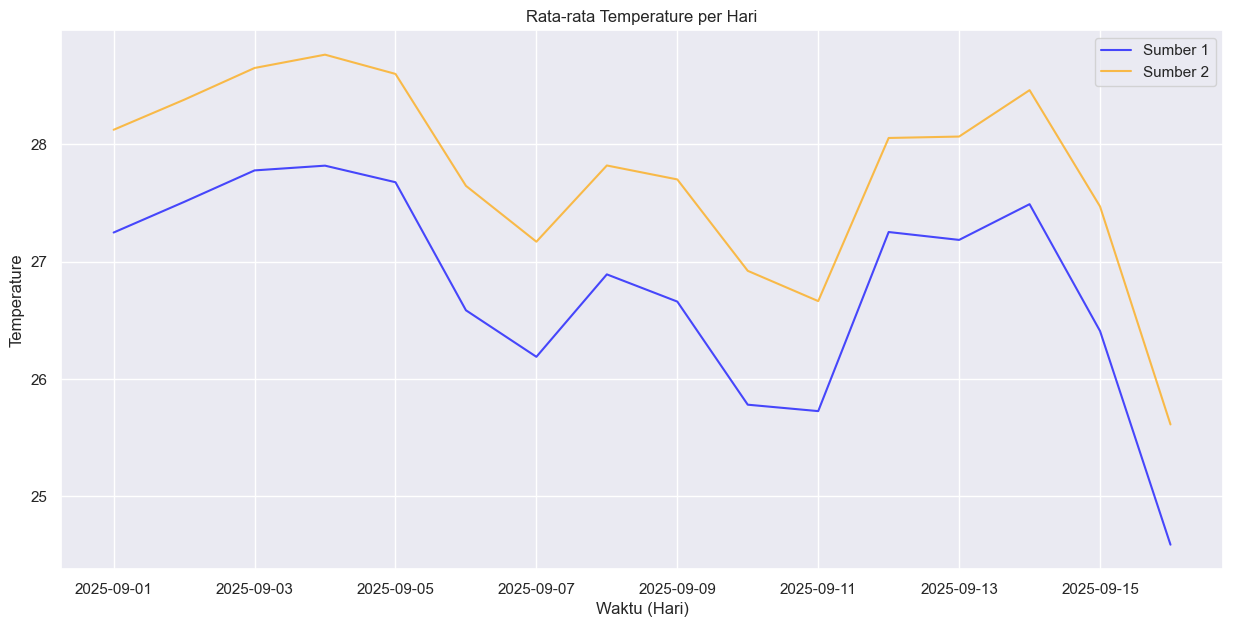

In [101]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat
datacuaca2['day'] = datacuaca2['timestamp'].dt.floor('d')

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()
datacuaca2_daily = datacuaca2.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_daily['day'], datacuaca2_daily[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

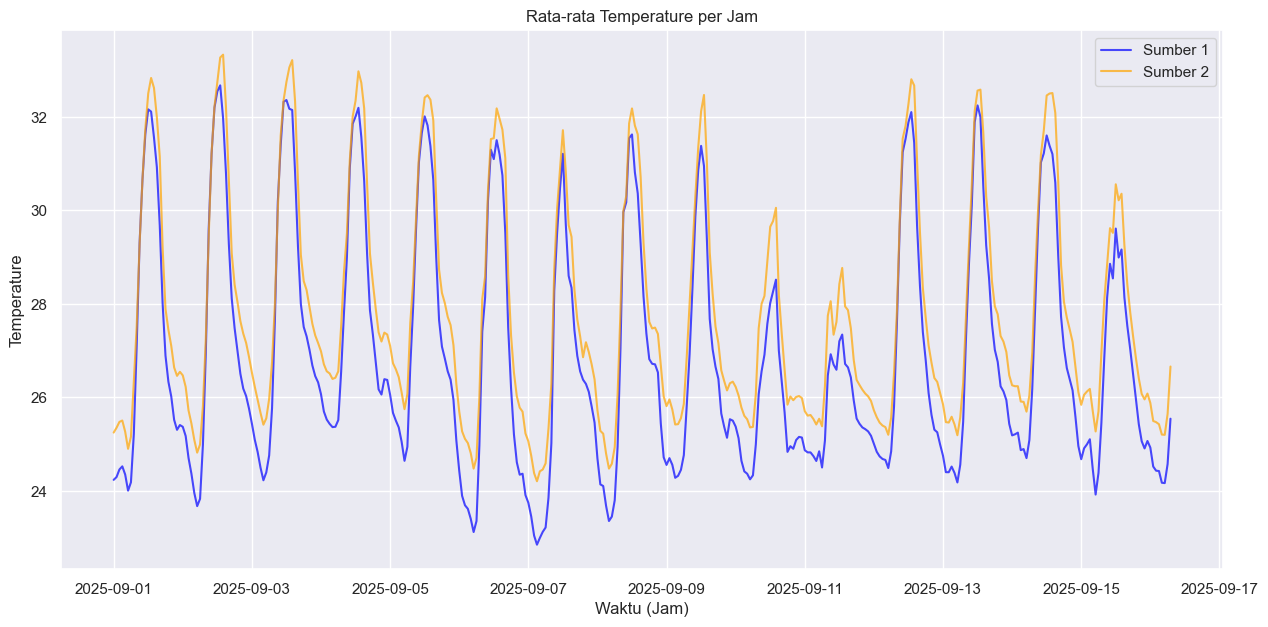

In [102]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()
datacuaca2_hourly = datacuaca2.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_hourly['hour'], datacuaca2_hourly[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()